In [17]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

Распределения: 

$f_0 (x, a, b) = \frac{1}{b} \cdot e^{-\frac{(x - a)}{b}} \cdot I\{ x > a\}$

$f_1 (x, a, b) = \frac{1}{2 b} \cdot e^{-\frac{|x - a|}{b}} $


$RLM = \frac{\displaystyle \max_{a,b} f_1 (X, a, b)}{\displaystyle \max_{a,b} f_0 (X, a, b)}
$

$\displaystyle \max_{a,b} f_0 (X, a, b) = \displaystyle \max_{a,b} \frac{1}{b^n} \cdot e^{-\frac{(\sum x_i - n a)}{b}} \cdot I\{ x_{(0)} > a\}
$

Максимум  $f_0$ достигается при $a = x_{(0)}, b = \bar{x} - x_{(0)}$

$\displaystyle \max_{a,b} f_1 (X, a, b) = \displaystyle \max_{a,b} \frac{1}{(2 b)^n} \cdot e^{-\frac{(\sum |x_i - a|)}{b}}
$

Максимум  $f_1$ достигается при $a = x_{(\frac{n}{2})}, b = \frac{\sum|x_i - x_{(\frac{n}{2})}|}{n \ln{2}}$


In [68]:
def f_0_max(X):
    n = len(X)
    a = np.min(X)
    b = np.mean(X) - a
    return 1 / np.log(b) * np.exp((np.mean(X) - a) / b)

def f_1_max(X):
    n = len(X)
    a = np.median(X)
    b = np.sum([np.abs(x- a) for x in X]) / (len(X))
    return 1 / (2 * b) * np.exp(np.sum([np.abs(x- a) for x in X]) / (b * len(X)) )

In [70]:
def RLM(X):
    return (f_1_max(X) / f_0_max(X))

In [79]:
def create_criteria_samples(n, size = 100):
    params = sps.uniform.rvs(1,100, size=size)
    samples = [sps.expon.rvs(param, size=n) for param in params]
    criteria_samples = [RLM(sample) for sample in samples]

    return criteria_samples

def create_criteria_samples_for_alternative(n, size = 100):
    params = sps.uniform.rvs(1,100, size=size)
    samples = [sps.laplace.rvs(param, size=n) for param in params]
    criteria_samples = [RLM(sample) for sample in samples]

    return criteria_samples

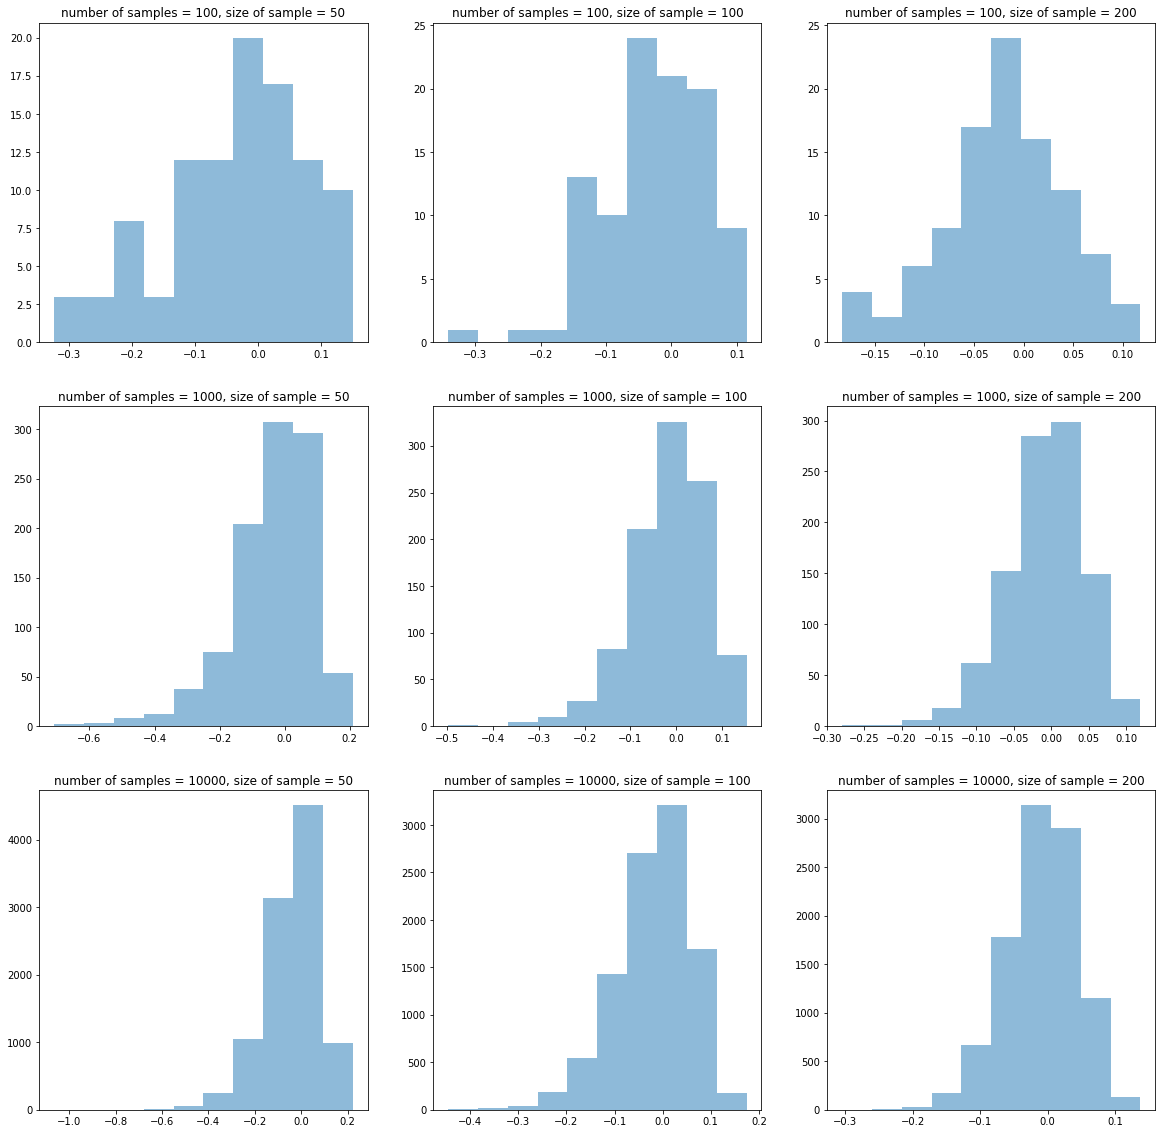

In [73]:
N = [50, 100, 200]
plt.figure(figsize=(20,20))
plt.title("distribution of RLM")
for i in range(3):
    for j in range(3):
        plt.subplot(3,3,3*j + i + 1)
        criteria_samples = create_criteria_samples(N[i], size = 100 * 10**j)
        plt.hist(criteria_samples, alpha = 0.5)
        plt.title("number of samples = %d, size of sample = %d" % (100 * 10**j,N[i]))
plt.show()

In [83]:
Alpha = [0.1, 0.05, 0.01]

for i in range(3):
    size = 10**4
    criteria_samples = create_criteria_samples(N[i], size = size)
    criteria_samples_for_alternative = create_criteria_samples_for_alternative(N[i], size = size)
    for j in range(3):
        quantile = sps.mstats.mquantiles(criteria_samples, 1 - Alpha[j])
        errors = [x for x in criteria_samples_for_alternative if (x > quantile)]
        prob = len(errors) / len(criteria_samples_for_alternative)
        print('Критерий: {RML(X) > %.2f}, мощность критерия: %.2f, при alpha = %.2f' % (quantile,prob,Alpha[j]))

Критерий: {RML(X) > 0.09}, мощность критерия: 1.00, при alpha = 0.10
Критерий: {RML(X) > 0.12}, мощность критерия: 1.00, при alpha = 0.05
Критерий: {RML(X) > 0.16}, мощность критерия: 1.00, при alpha = 0.01
Критерий: {RML(X) > 0.07}, мощность критерия: 1.00, при alpha = 0.10
Критерий: {RML(X) > 0.09}, мощность критерия: 1.00, при alpha = 0.05
Критерий: {RML(X) > 0.13}, мощность критерия: 1.00, при alpha = 0.01
Критерий: {RML(X) > 0.05}, мощность критерия: 1.00, при alpha = 0.10
Критерий: {RML(X) > 0.07}, мощность критерия: 1.00, при alpha = 0.05
Критерий: {RML(X) > 0.09}, мощность критерия: 1.00, при alpha = 0.01
